# Project 2: Implementing a Simple Convolutional Neural Network (CNN)

## Introduction

In this project, you will design, implement, and evaluate a simple Convolutional Neural Network (CNN) from scratch. This will involve building the entire pipeline, from data preprocessing to model training and evaluation.

## Objectives

1. Set up TensorFlow or PyTorch environments. You are free to choose your preferred DL platform.
2. Use GPU for training.
3. Create a data loader and implement data preprocessing where needed.
4. Design a Convolutional Neural Network.
5. Train and evaluate your model. Make sure to clearly show loss and accuracy values. Include visualizations too.
6. Answer assessment questions.

## Dataset

You are free to choose any dataset for this project!  (Note, however, that your work should not simply mirror models already covered in the course, nor published works of others.) Kaggle would be a good source to look for datasets. Below are some examples that we have already seen, which would be of an appropriate nature; you might tackle these (with your own approach), or choose a different dataset:
- CIFAR-10: A dataset of 60,000 32x32 color images in 10 classes with 6,000 images per class.
- Fashion-MNIST: A dataset of 70,000 28x28 grayscale images of 10 different clothing caregories.


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
root_dir = "archive/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)"

train_dir = root_dir + "/train"
valid_dir = root_dir + "/valid"

test_dir = "archive/test/test"

disease_classes = os.listdir(train_dir)

disease_classes_val = os.listdir(valid_dir)

disease_classes_test = os.listdir(test_dir)

print(str(disease_classes), "\n")

print(
    f"Train Dataset labels : {len(disease_classes)}\n"
    f"Train Dataset labels val : {len(disease_classes_val)}\n"
    f"Train Dataset labels test : {len(disease_classes_test)}\n"
)


['Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Blueberry___healthy', 'Raspberry___healthy', 'Tomato___Late_blight', 'Apple___healthy', 'Peach___Bacterial_spot', 'Squash___Powdery_mildew', 'Tomato___Early_blight', 'Cherry_(including_sour)___Powdery_mildew', 'Soybean___healthy', 'Potato___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___healthy', 'Strawberry___Leaf_scorch', 'Corn_(maize)___Common_rust_', 'Cherry_(including_sour)___healthy', 'Apple___Black_rot', 'Grape___Esca_(Black_Measles)', 'Tomato___Target_Spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Leaf_Mold', 'Tomato___healthy', 'Potato___Early_blight', 'Corn_(maize)___Northern_Leaf_Blight', 'Apple___Cedar_apple_rust', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Pepper,_bell___healthy', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Straw

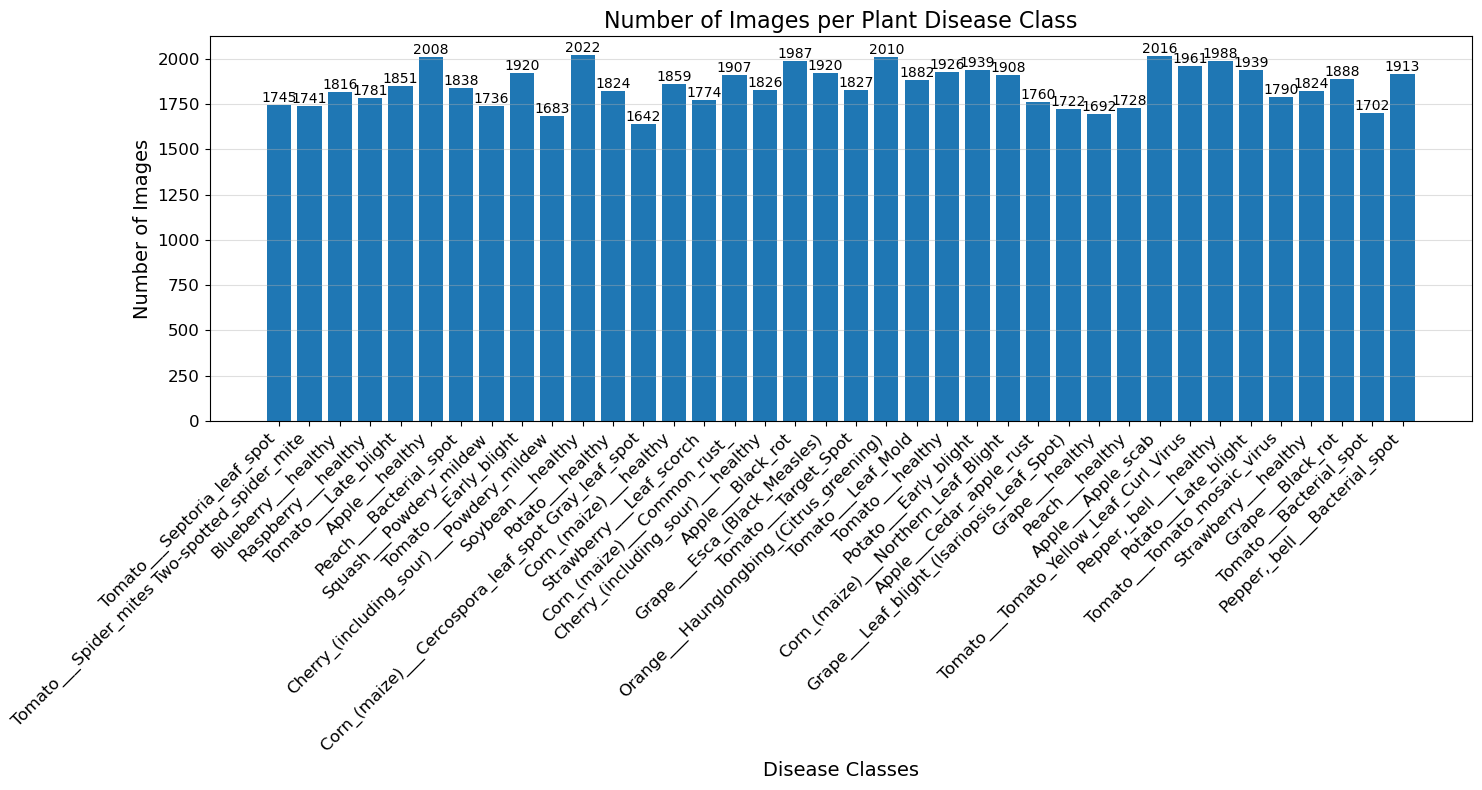


Image Count Summary:
Tomato___Septoria_leaf_spot   :  1745 images
Tomato___Spider_mites Two-spotted_spider_mite:  1741 images
Blueberry___healthy           :  1816 images
Raspberry___healthy           :  1781 images
Tomato___Late_blight          :  1851 images
Apple___healthy               :  2008 images
Peach___Bacterial_spot        :  1838 images
Squash___Powdery_mildew       :  1736 images
Tomato___Early_blight         :  1920 images
Cherry_(including_sour)___Powdery_mildew:  1683 images
Soybean___healthy             :  2022 images
Potato___healthy              :  1824 images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot:  1642 images
Corn_(maize)___healthy        :  1859 images
Strawberry___Leaf_scorch      :  1774 images
Corn_(maize)___Common_rust_   :  1907 images
Cherry_(including_sour)___healthy:  1826 images
Apple___Black_rot             :  1987 images
Grape___Esca_(Black_Measles)  :  1920 images
Tomato___Target_Spot          :  1827 images
Orange___Haunglongbing_(Citrus

In [3]:
from colorama import Fore, Style  # Pour colorer le texte dans la console (affichage plus lisible)

# ===================== Calcul du nombre d'images par classe =====================

label_counts = {}  # Dictionnaire pour stocker le nombre d’images par classe

# Pour chaque classe dans le dossier d'entraînement
for label in disease_classes:
    image_paths = os.listdir(os.path.join(train_dir, label))  # Liste les images de cette classe
    label_counts[label] = len(image_paths)  # Stocke le nombre d’images dans le dictionnaire

# ===================== Création du diagramme en barres =====================

plt.figure(figsize=(15, 8))  # Définit la taille de la figure

# Crée un graphique en barres : les clés sont les classes, les valeurs sont les quantités d’images
bars = plt.bar(label_counts.keys(), label_counts.values())

# ===================== Personnalisation du graphique =====================

plt.title('Number of Images per Plant Disease Class', fontsize=16)  # Titre du graphique
plt.xlabel('Disease Classes', fontsize=14)  # Nom de l'axe X
plt.ylabel('Number of Images', fontsize=14)  # Nom de l'axe Y
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotation et style des étiquettes sur l’axe X
plt.yticks(fontsize=12)  # Taille de police sur l’axe Y
plt.grid(axis='y', alpha=0.4)  # Affiche une grille horizontale légère

# ===================== Affichage des valeurs sur chaque barre =====================

for bar in bars:
    height = bar.get_height()  # Hauteur de chaque barre (nombre d’images)
    plt.text(bar.get_x() + bar.get_width()/2., height,  # Position du texte
             f'{int(height)}',  # Texte affiché (nombre d’images)
             ha='center', va='bottom', fontsize=10)  # Alignement et style du texte

plt.tight_layout()  # Ajuste automatiquement les marges du graphique
plt.show()  # Affiche le graphique

# ===================== Affichage d’un résumé dans la console =====================

print(Fore.GREEN + "\nImage Count Summary:")  # Titre coloré
for label, count in label_counts.items():
    print(f"{label:<30}: {count:>5} images")  # Affiche le nom de la classe et le nombre d’images

# Affiche le total de toutes les images
print(Style.RESET_ALL + f"\nTotal images: {sum(label_counts.values())}")

In [4]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader  # Pour créer des batchs de données

from PIL import Image  # Pour manipuler les images

import torchvision
import torchvision.transforms as transforms  # Pour appliquer des transformations aux images
from torchvision.datasets import ImageFolder  # Pour charger des datasets organisés par dossiers

import torch.optim as optim  # Optimiseurs (SGD, Adam, etc.)
import torch.nn.functional as F  # Fonctions d’activation et perte (ReLU, CrossEntropy, etc.)

# ===================== Chargement des images =====================

image_transform = transforms.Compose([
    transforms.Resize((128, 128)),  # 🔽 Reduce image size (e.g., from 224x224 to 128x128)
    transforms.ToTensor(),          # Convert to tensor
    transforms.Normalize(           # 🔧 Optional: Normalize to improve training stability
        mean=[0.5, 0.5, 0.5],       # Adjust mean and std if needed
        std=[0.5, 0.5, 0.5]
    )
])

# Charge les images du dossier d'entraînement, et les transforme en tenseurs PyTorch
train = ImageFolder(train_dir, transform=image_transform)

# Charge les images du dossier de validation
valid = ImageFolder(valid_dir, transform=image_transform) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9372549..0.7176471].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..0.5686275].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.35686278].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9607843..0.92941177].


Dataset ImageFolder
    Number of datapoints: 70295
    Root location: archive/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )
torch.Size([3, 128, 128]) 0
Label : Apple___Apple_scab (0)
Label : Apple___Black_rot (1)
Label : Apple___Cedar_apple_rust (2)
Label : Blueberry___healthy (4)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.90588236..0.73333335].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.96862745].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..0.7882353].


Label : Cherry_(including_sour)___healthy (6)
Label : Corn_(maize)___Common_rust_ (8)
Label : Tomato___Septoria_leaf_spot (32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8039216..0.6].


Label : Tomato___healthy (37)


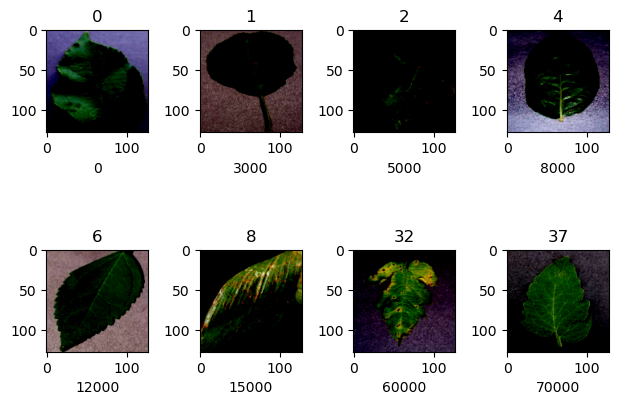

In [5]:
# Affiche le résumé du dataset PyTorch (ImageFolder)
print(train)

# Récupère la première image et son label
img, label = train[0]

# Affiche la forme (dimensions) du tenseur image et le label (index)
print(img.shape, label)

# Fonction pour afficher une image avec son label (nom de classe)
def show_image(image, label):
    print("Label : " + train.classes[label] + " (" + str(label) + ")")  # Affiche le nom de la classe et son index
    plt.imshow(image.permute(1, 2, 0))  # Change l'ordre des dimensions pour l'affichage (H x W x C)

# Liste d’indices d’images à afficher (exemples variés)
image_list = [0, 3000, 5000, 8000, 12000, 15000, 60000, 70000]

chs = 0  # Compteur pour position dans la grille du plot

for img in image_list:
    chs += 1
    plt.subplot(2, 4, chs)  # Crée une grille 2x4 pour afficher les images
    plt.tight_layout()  # Ajuste l’espacement entre les subplots
    plt.xlabel(img, fontsize=10)  # Affiche l’indice de l’image en dessous
    plt.title(train[img][1])  # Affiche l’index de la classe (numérique) en titre
    show_image(*train[img])  # Affiche l’image avec son label

In [6]:
batch_size = 32

# DataLoaders for training and validation
train_dataloader = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dataloader = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)

# Device selection
def get_default_device():
    """Pick GPU if available, else CPU"""
    print(torch.cuda)
    if torch.cuda.is_available():
        return torch.device("cuda")
    else:
        return torch.device("cpu")

# Move data to device
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# Wrapper to move batches to device automatically
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dataloader, device):
        self.dataloader = dataloader
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dataloader:
            yield to_device(b, self.device)
        
    def __len__(self):
        """Number of batches"""
        return len(self.dataloader)

device = get_default_device()

# Wrap dataloaders
train_dataloader = DeviceDataLoader(train_dataloader, device)
valid_dataloader = DeviceDataLoader(valid_dataloader, device)

# Accuracy calculation
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# Base class with training and validation steps
class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

# Convolutional block with batch norm and optional pooling
def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)

# CNN model with residual blocks
class CNN_NeuralNet(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()
        
        self.conv1 = ConvBlock(in_channels, 64)
        self.conv2 = ConvBlock(64, 128, pool=True) 
        self.res1 = nn.Sequential(ConvBlock(128, 128), ConvBlock(128, 128))
        
        self.conv3 = ConvBlock(128, 256, pool=True) 
        self.conv4 = ConvBlock(256, 512, pool=True)
        
        self.res2 = nn.Sequential(ConvBlock(512, 512), ConvBlock(512, 512))
        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                       nn.Flatten(),
                                       nn.Linear(512, num_diseases))
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out        

# Instanciation et transfert sur device
model = to_device(CNN_NeuralNet(3, len(train.classes)), device)
print(model)

<module 'torch.cuda' from '/home/toybot/anaconda3/envs/gvenv/lib/python3.10/site-packages/torch/cuda/__init__.py'>
CNN_NeuralNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1

In [7]:
train[0]

(tensor([[[ 0.3176,  0.3098,  0.3020,  ...,  0.4745,  0.4667,  0.4353],
          [ 0.3255,  0.3176,  0.3020,  ...,  0.4745,  0.4745,  0.4588],
          [ 0.3333,  0.3333,  0.3333,  ...,  0.4667,  0.4588,  0.4588],
          ...,
          [-0.1765, -0.1922, -0.2078,  ..., -0.0275, -0.0196, -0.0196],
          [-0.2000, -0.1843, -0.2000,  ..., -0.0118, -0.0039, -0.0039],
          [-0.2000, -0.1922, -0.2000,  ..., -0.0588, -0.0431, -0.0353]],
 
         [[ 0.2863,  0.2784,  0.2706,  ...,  0.4510,  0.4431,  0.4118],
          [ 0.2941,  0.2863,  0.2706,  ...,  0.4510,  0.4510,  0.4353],
          [ 0.3020,  0.3020,  0.3020,  ...,  0.4431,  0.4353,  0.4353],
          ...,
          [-0.2549, -0.2706, -0.2863,  ..., -0.1529, -0.1451, -0.1451],
          [-0.2784, -0.2627, -0.2784,  ..., -0.1373, -0.1294, -0.1294],
          [-0.2784, -0.2706, -0.2784,  ..., -0.1843, -0.1686, -0.1608]],
 
         [[ 0.5451,  0.5373,  0.5294,  ...,  0.6784,  0.6706,  0.6392],
          [ 0.5529,  0.5451,

In [8]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [9]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0,
                grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []  # For collecting the results
    
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    
    # Scheduler OneCycleLR
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr,
                                                epochs=epochs, steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
                
            optimizer.step()
            optimizer.zero_grad()
            
            # Record learning rates and update scheduler
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
        
    return history

In [10]:
# del output, loss
import gc
gc.collect()
torch.cuda.empty_cache()


In [ ]:
# Configuration des hyperparamètres d'entraînement
num_epoch = 5           # Nombre d'époques (cycles complets sur le jeu d'entraînement)
lr_rate = 0.01          # Taux d'apprentissage maximal pour le scheduler One Cycle
grad_clip = 0.15        # Valeur maximale pour le clipping des gradients afin d'éviter l'explosion
weight_decay = 1e-4     # Régularisation L2 pour réduire le surapprentissage
optims = torch.optim.Adam  # Optimiseur choisi (Adam)

# Évaluation initiale avant entraînement
history = [evaluate(model, valid_dataloader)]

# Lancement de l'entraînement 
history += fit_OneCycle(
    num_epoch, lr_rate, model, train_dataloader, valid_dataloader, 
    # grad_clip=grad_clip, 
    weight_decay=weight_decay, 
    opt_func=optims
)


RuntimeError: Given input size: (512x2x2). Calculated output size: (512x0x0). Output size is too small

: 

---
### Questions
Answer the following questions in detail.

1. What is a Convolutional Neural Network (CNN)? Describe its key components and how they differ from those in a fully connected neural network.

A CNN is a deep-learning architecture designed to learn spatial hierarchies of features from grid-like data (e.g., images, audio spectrograms).Components of Convolutional Neural Network (CNN) are as follows:
a) Convolutional layer - Convolutional layer Sliding through the input with learnable filters (kernels) and generating feature maps and identifying local patterns (edges, textures, and so on). In FC layers all neurons are connected to all input units parameters.

b) Activation Function - Activation Adds non-linearity, usually using some type of activation (e.g. ReLU) to allow the network to represent complex functions. Identical to FC nets except applied on an element level to feature maps.

c) Pooling - Pooling / Sub-sampling Down-samples feature maps such that they have reduced spatial resolution to be invariant to small translations as well as to reduce computations. There is no direct legal analogy in normal FC nets.
d) Batch Normalization - Normalization (Batch/Layer Norm) helps training to be stable, it keeps activations within sane numbers. Likewise FC nets, except feature maps are normalised in place of the channel and spatial dims.

e) Fully Connected head - Fully connected head The high level features are flattened after several conv blocks, and input into FC layers to do final classification/regression. The same in concept, only this time they observe abstractions of features instead of naked pixels.


2. Explain the purpose of the convolution operation in a CNN. How does the use of different filter sizes affect the feature maps?

It provides local pattern extraction with weight sharing.    The kernels finds at just 9 neighbouring pixels, learning detectors like edges,, corner, color blobs. Because the same kernel slides across the whole image, the network recognises a pattern wherever it occurs. 
a) 1X1 - Mixes information across channels but not space; great for dimensionality reduction.
b) 3X3 - Captures fine-grained local patterns while keeping parameters low. Two stacked 3 × 3 layers give an effective 5 × 5 receptive field.
c) 5X5, 7X7 - Capture broader context but add parameters and FLOPs. Often replaced by stacks of 3 × 3s or dilated convolutions for efficiency.




3. What is the purpose of a pooling layer in a CNN, and how does it contribute to the network’s performance?

Purpose of a pooling layer are as follows:
- Reduces wdth and height so later layers operate on smaller maps.
- Max-pool keeps the strongest activation withina window, making the eexact feature position less critical.
- It helps in regulatization by applying fewer activation which leads to smaller subsequen layers and less risk of overfitting.


4. Why are activation functions important in CNNs? Compare the use of ReLU (Rectified Linear Unit) with other activation functions.

Activation functions are important in CNN to introduce non-linearity which can learn complex pattern and without it convolutions would not work in a linear to transformations.

-Sigmoid functions - Sigmoid will produce the values in 0 to 1  and hence can be used in binary classification tasks. The problem with it though, is that it can be affected by the vanishing gradient problem, particularly in deep networks, whereby gradients can become extremely small during backpropagation, and can make learning slow.

- Tanh - Just like sigmoid, tanh is also sigmoidal in shape with the output usually around -1 to 1. Although, unlike sigmoid, it is impervious to negative inputs, it still suffers the same problem of the vanishing gradient, especially in deep networks.

- ReLU - ReLU solves the vanishing gradient issue by simply giving the input directly as output in case of non-negative input, and zero in case otherwise. This is on the one hand enables quicker training than sigmoid and tanh, particularly in the case of deep networks. Nonetheless, ReLU are vulnerable to what is known as the problem of dying ReLU whereby neurons may become idle and cease learning when they always produce the value zero.




5. Describe the process of training a CNN. What are some common challenges faced during training?

The Process involves following processes:
1. Data Preparation - 
- Collecting and Labelling-
Get a pertinent dataset and provide every picture with the password of a specific type (e.g., cat or dog).
- Preprocessing:
Image preparation consists of converting image to CNN format by resizing, normalization of images and possible augmenting using rotations, flips. This is able to enhance model performance and avoid overfitting.
- Splitting:
Split the dataset into test, validation and training sets. The training set is meant to be used to train the model, the validation set to observe performance through training and the test set to evaluate the final model.

2. Model Definition:
- Architecture: CNN architecture. It includes the selection of the number, type of the layers (convolutional, pooling, fully connected, etc.).
- Convolutional Layers: The convolutional layers utilize filters to bring out features on the image that is input.
- Pooling Layers: These are layers that bring about a reduction of spatial dimensions of the feature maps.
- Activation Function: The concept of non-linearity is achieved by implementing non-linear functions such as ReLU.
- Fully Connected Layers: These are the layers that are usually at the end of the network and it is the job of the layers to make the prediction by use of features which have been extracted.
3. Training:
- Optimizer: Select an optimization method (e.g., Adam, SGD) to adjust weights concerning the model.
- Loss Function: Choose a loss (e.g. cross-entropy) that would quantify the discrepancies between the prediction produced by a model and the real labels.
- Training Loop: Go over the training data, passing batches of images into the CNN.
- Forward Pass: The CNN is fed with imageries in order to make the predictions.
- Backpropagation: Compute the gradient of the loss function with regard to the weights of the model.
- Weight Update: Update the weights of the model based upon the optimizer and the obtained gradients.
4. Evaluation:
- Validation Set:
Track the model performances on the validation set when training. This aids in identification of overfitting and fine tuning hyper parameters.
- Test Set:
After the completion of training, we can measure the performance of the model on unseen test set to evaluate the capability of generalization.

Some Challenges are as follows :
- Vanishing / exploding gradients - fixed by ReLU, batch-norm, scrupulous weight forms, and closing connections.

- Overfitting Overfitting was addressed through data augmentation, dropout, weight decay and use of larger datasets.

- Imbalance of classes - weighted loss, focal loss or resampling.

- Computational; it is memory/FLOPs demanding; it can be addressed with mixed-precision training, model shrinking, pruning, and quantisation.


6. What are some common evaluation metrics used to assess the performance of a CNN on a classification task?
- Accuracy – % of correctly classified samples (most common).

- Top-k accuracy – Especially for datasets with many classes (e.g., ImageNet) — did the correct label appear in the top-k predictions?

- Precision / Recall / F1-score – Useful when classes are imbalanced.

- Confusion matrix – Visualises per-class performance.

- AUC-ROC / PR-AUC – For tasks where you treat each class as a one-vs-rest problem.



7. How does data augmentation help improve the performance of a CNN? Provide examples of common data augmentation techniques.

Augmentation synthetically expands the training set by applying label-preserving transformations, helping the model generalise to real-world variations and reducing overfitting.
Some of the common techniques to augment data are as follows:
- Random crop/resize, horizontal or vertical flip, small rotations, translations, perspective warp, cutout.
- Colour jitter (brightness, contrast, saturation, hue), Gaussian noise, blurring, sharpening.


---
### Submission
Submit a link to your completed Jupyter Notebook (e.g., on GitHub (private) or Google Colab) with all the cells executed, and answers to the assessment questions included at the end of the notebook.